<a href="https://colab.research.google.com/github/lingelizabeth/senior-research/blob/master/Final_Notebook_RAVDESS_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving emobaseResults.csv to emobaseResults.csv


In [0]:
!ls

emobaseResults.csv  tiffany_disgust.csv  tiffany_fear_or_surprise.csv
sample_data	    tiffany_emobase.csv  tiffany_neutral.csv
TESSemobase.csv     tiffany_fear.csv


In [0]:
from scipy.io import *
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import io
import pandas as pd
import random
from sklearn import metrics
from google.colab import files

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.interpolate import *
from scipy.signal import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#import keras


In [0]:
df = pd.read_csv(io.StringIO(uploaded['emobaseResults.csv'].decode('utf-8')))
df

,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,Unnamed: 991
0,'liveturn_0',0.012500,1.362365e-07,0.000000e+00,1.362365e-07,1.440000e+02,0.000000e+00,4.216511e-09,-6.037146e-12,5.200566e-09,6.415516e-09,1.989194e-16,1.411539e-08,6.595681e+00,5.567509e+01,0.000000e+00,1.917901e-13,1.437814e-09,1.917901e-13,1.437622e-09,1.437814e-09,4.572931e-01,0.000000e+00,4.572931e-01,1.440000e+02,0.000000e+00,6.709688e-02,-8.127060e-06,6.842159e-02,7.985796e-02,9.389587e-03,9.690292e-02,1.444151e+00,4.332970e+00,0.000000e+00,5.961477e-03,1.222499e-01,5.961477e-03,1.162884e-01,1.222499e-01,...,1.144037e+02,-8.626321e+01,2.006669e+02,1.050000e+02,1.140000e+02,3.353901e-08,-4.498857e-03,7.333137e-01,9.205888e+00,4.354054e+02,2.087069e+01,6.428310e-01,1.121827e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.244152e+01,-1.907459e+01,8.151611e+01,1.060000e+02,1.430000e+02,7.064382e-01,-3.854016e-03,1.334643e+00,2.469746e+00,5.165498e+01,7.196342e+00,5.777043e+00,4.680230e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
1,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quar

In [0]:
tessdf = pd.read_csv(io.StringIO(uploaded['TESSemobase.csv'].decode('utf-8')), error_bad_lines=False)
tessdf

,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
0,'liveturn_0',0.012500,1.464175e-06,0.000000e+00,1.464175e-06,3.300000e+01,0.000000e+00,2.161744e-07,2.042329e-10,1.961596e-07,...,1.176027e+01,1.801197e+00,9.904008e+00,-3.477084e+00,0.000000e+00,5.340744e+00,3.477084e+00,5.340744e+00,8.817828e+00,3
1,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
2,'liveturn_0',0.012500,1.811099e-06,0.000000e+00,1.811099e-06,1.530000e+02,0.000000e+00,1.903698e-07,2.231987e-11,1.881490e-07,...,8.687294e+00,5.867910e-01,4.751102e+00,-1.135715e+00,0.000000e+00,2.649446e+00,1.135715e+00,2.649446e+00,3.785162e+00,3
3,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
4,'liveturn_0',0.012500,1.338246e-06,0.000000e+00,1.338246e-06,1.510000e+02,0.000000e+00,1.500240e-07,6.357056e-11,1.436987e-07,...,1.004017e+01,1.879947e+00,1.120945e+01,-1.369785e+00,0.000000e+00,4.072070e+00,1.369785e+00,4.072070e+00,5.441854e+00,3
5,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
6,'liveturn_0',0.012500,2.140909e-06,0.000000e+00,2.140909e-06,1.490000e+02,0.000000e+00,2.874307e-07,1.176422e-09,1.797881e-07,...,1.238628e+01,1.091799e+00,7.634090e+00,-5.744744e+00,0.000000e+00,8.687378e+00,5.744744e+00,8.687378e+00,1.443212e+01,3
7,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
8,'liveturn_0',0.012500,3.340435e-06,0.000000e+00,3.340435e-06,1.640000e+02,0.000000e+00,2.685476e-07,9.920774e-10,1.708279e-07,...,1.084036e+01,1.067189e+00,7.951168e+00,-2.364683e+00,2.421409e-01,4.445379e+00,2.606824e+00,4.203238e+00,6.810062e+00,3
9,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion


In [0]:
#REFORMAT TESS DATA
dropped = [i for i in range(1, tessdf.shape[0], 2)]
tessdf = tessdf.drop(dropped)
tessdf = tessdf.reset_index()
set(tessdf['emotion'])

#tess = tessdf.loc[:, ~tessdf.columns.str.contains('^Unnamed')]
tess = tessdf.drop(['name', 'frameTime', 'index'], axis=1)
tess


,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
0,1.464175e-06,0.000000e+00,1.464175e-06,3.300000e+01,0.000000e+00,2.161744e-07,2.042329e-10,1.961596e-07,2.242406e-07,1.039582e-13,...,1.176027e+01,1.801197e+00,9.904008e+00,-3.477084e+00,0.000000e+00,5.340744e+00,3.477084e+00,5.340744e+00,8.817828e+00,3
1,1.811099e-06,0.000000e+00,1.811099e-06,1.530000e+02,0.000000e+00,1.903698e-07,2.231987e-11,1.881490e-07,2.027691e-07,8.684970e-14,...,8.687294e+00,5.867910e-01,4.751102e+00,-1.135715e+00,0.000000e+00,2.649446e+00,1.135715e+00,2.649446e+00,3.785162e+00,3
2,1.338246e-06,0.000000e+00,1.338246e-06,1.510000e+02,0.000000e+00,1.500240e-07,6.357056e-11,1.436987e-07,1.596913e-07,5.609143e-14,...,1.004017e+01,1.879947e+00,1.120945e+01,-1.369785e+00,0.000000e+00,4.072070e+00,1.369785e+00,4.072070e+00,5.441854e+00,3
3,2.140909e-06,0.000000e+00,2.140909e-06,1.490000e+02,0.000000e+00,2.874307e-07,1.176422e-09,1.797881e-07,3.246617e-07,1.829702e-13,...,1.238628e+01,1.091799e+00,7.634090e+00,-5.744744e+00,0.000000e+00,8.687378e+00,5.744744e+00,8.687378e+00,1.443212e+01,3
4,3.340435e-06,0.000000e+00,3.340435e-06,1.640000e+02,0.000000e+00,2.685476e-07,9.920774e-10,1.708279e-07,2.889868e-07,2.339521e-13,...,1.084036e+01,1.067189e+00,7.951168e+00,-2.364683e+00,2.421409e-01,4.445379e+00,2.606824e+00,4.203238e+00,6.810062e+00,3
5,3.997887e-06,0.000000e+00,3.997887e-06,1.530000e+02,0.000000e+00,2.188087e-07,2.435530e-09,1.178869e-08,2.504977e-07,2.265386e-13,...,1.039361e+01,1.826887e+00,8.930263e+00,-2.281558e+00,0.000000e+00,6.386923e+00,2.281558e+00,6.386923e+00,8.668481e+00,3
6,3.103672e-06,0.000000e+00,3.103672e-06,1.370000e+02,0.000000e+00,1.800203e-07,1.621297e-09,5.112717e-08,1.861952e-07,1.396446e-13,...,1.168230e+01,6.038660e-01,4.419493e+00,-3.856646e+00,9.884338e-02,1.017422e+01,3.955489e+00,1.007537e+01,1.403086e+01,3
7,1.825966e-06,0.000000e+00,1.825966e-06,1.610000e+02,0.000000e+00,1.702170e-07,9.646132e-10,7.134420e-08,1.751214e-07,8.304191e-14,...,1.242119e+01,1.037589e+00,6.656396e+00,-6.260477e+00,0.000000e+00,5.857365e+00,6.260477e+00,5.857365e+00,1.211784e+01,3
8,2.252421e-06,0.000000e+00,2.252421e-06,1.520000e+02,0.000000e+00,2.330504e-07,8.357076e-10,1.557474e-07,2.768492e-07,1.709901e-13,...,9.367461e+00,3.498960e-01,3.624802e+00,-2.208558e+00,4.030739e-01,5.351002e+00,2.611632e+00,4.947928e+00,7.559560e+00,3
9,2.707440e-06,0.000000e+00,2.707440e-06,9.900000e+01,0.000000e+00,2.609035e-07,9.624247e-10,1.766913e-07,2.663686e-07,2.056809e-13,...,1.038625e+01,1.194512e+00,7.002633e+00,-5.620239e-01,0.000000e+00,5.334225e+00,5.620239e-01,5.334225e+00,5.896249e+00,3


In [0]:
tesspositive = [] #1 for yes 0 for negative
for index, row in tess.iterrows():
  #print(row[' emotion '])
  if(int(row['emotion']) in [1, 2, 3, 8]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    tesspositive.append(1)
  else:
    tesspositive.append(0)
#print(positive)
#print(new_df[' emotion '])
    

In [0]:
dropped = [i for i in range(1, 2804, 2)]
df = df.drop(dropped)
df = df.reindex(labels = range(1403), axis = 0, method = 'backfill')
df


,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,Unnamed: 991
0,'liveturn_0',0.012500,1.362365e-07,0.000000e+00,1.362365e-07,1.440000e+02,0.000000e+00,4.216511e-09,-6.037146e-12,5.200566e-09,6.415516e-09,1.989194e-16,1.411539e-08,6.595681e+00,5.567509e+01,0.000000e+00,1.917901e-13,1.437814e-09,1.917901e-13,1.437622e-09,1.437814e-09,4.572931e-01,0.000000e+00,4.572931e-01,1.440000e+02,0.000000e+00,6.709688e-02,-8.127060e-06,6.842159e-02,7.985796e-02,9.389587e-03,9.690292e-02,1.444151e+00,4.332970e+00,0.000000e+00,5.961477e-03,1.222499e-01,5.961477e-03,1.162884e-01,1.222499e-01,...,1.144037e+02,-8.626321e+01,2.006669e+02,1.050000e+02,1.140000e+02,3.353901e-08,-4.498857e-03,7.333137e-01,9.205888e+00,4.354054e+02,2.087069e+01,6.428310e-01,1.121827e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.244152e+01,-1.907459e+01,8.151611e+01,1.060000e+02,1.430000e+02,7.064382e-01,-3.854016e-03,1.334643e+00,2.469746e+00,5.165498e+01,7.196342e+00,5.777043e+00,4.680230e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
1,'liveturn_0',0.012500,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-08,3.961011e+00,1.913523e+01,0.000000e+00,2.301366e-13,1.562340e-09,2.301366e-13,1.562110e-09,1.562340e-09,4.943393e-01,0.000000e+00,4.943393e-01,1.110000e+02,0.000000e+00,7.309889e-02,-6.337269e-06,7.414137e-02,8.525402e-02,1.166168e-02,1.079910e-01,1.594957e+00,4.877197e+00,0.000000e+00,6.161644e-03,1.198717e-01,6.161644e-03,1.137100e-01,1.198717e-01,...,8.954742e+01,-6.271112e+01,1.522585e+02,1.060000e+02,1.180000e+02,-2.822190e-08,-4.610978e-03,7.585059e-01,9.731137e+00,3.431158e+02,1.852859e+01,9.364156e-01,7.774379e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.936052e+01,-1.487350e+01,6.423402e+01,1.080000e+02,1.270000e+02,5.360466e-01,-2.924453e-03,1.017119e+00,2.626107e+00,3.887719e+01,6.241378e+00,4.334537e+00,3.254277e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,NaN
2,'liveturn_0',0.012500,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-08,3.961011e+00,1.913523e+01,0.0000

In [0]:
new_df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
new_df = new_df.drop([' name ', ' frameTime '], axis=1)
new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion
0,1.362365e-07,0.000000e+00,1.362365e-07,1.440000e+02,0.000000e+00,4.216511e-09,-6.037146e-12,5.200566e-09,6.415516e-09,1.989194e-16,1.411539e-08,6.595681e+00,5.567509e+01,0.000000e+00,1.917901e-13,1.437814e-09,1.917901e-13,1.437622e-09,1.437814e-09,4.572931e-01,0.000000e+00,4.572931e-01,1.440000e+02,0.000000e+00,6.709688e-02,-8.127060e-06,6.842159e-02,7.985796e-02,9.389587e-03,9.690292e-02,1.444151e+00,4.332970e+00,0.000000e+00,5.961477e-03,1.222499e-01,5.961477e-03,1.162884e-01,1.222499e-01,2.347752e+01,-5.992237e+01,...,4.555073e-02,1.144037e+02,-8.626321e+01,2.006669e+02,1.050000e+02,1.140000e+02,3.353901e-08,-4.498857e-03,7.333137e-01,9.205888e+00,4.354054e+02,2.087069e+01,6.428310e-01,1.121827e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.244152e+01,-1.907459e+01,8.151611e+01,1.060000e+02,1.430000e+02,7.064382e-01,-3.854016e-03,1.334643e+00,2.469746e+00,5.165498e+01,7.196342e+00,5.777043e+00,4.680230e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
1,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-08,3.961011e+00,1.913523e+01,0.000000e+00,2.301366e-13,1.562340e-09,2.301366e-13,1.562110e-09,1.562340e-09,4.943393e-01,0.000000e+00,4.943393e-01,1.110000e+02,0.000000e+00,7.309889e-02,-6.337269e-06,7.414137e-02,8.525402e-02,1.166168e-02,1.079910e-01,1.594957e+00,4.877197e+00,0.000000e+00,6.161644e-03,1.198717e-01,6.161644e-03,1.137100e-01,1.198717e-01,2.021643e+01,-5.243045e+01,...,3.712282e-02,8.954742e+01,-6.271112e+01,1.522585e+02,1.060000e+02,1.180000e+02,-2.822190e-08,-4.610978e-03,7.585059e-01,9.731137e+00,3.431158e+02,1.852859e+01,9.364156e-01,7.774379e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.936052e+01,-1.487350e+01,6.423402e+01,1.080000e+02,1.270000e+02,5.360466e-01,-2.924453e-03,1.017119e+00,2.626107e+00,3.887719e+01,6.241378e+00,4.334537e+00,3.254277e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-0

In [0]:
positive = [] #1 for yes 0 for negative
for index, row in df.iterrows():
  #print(row[' emotion '])
  if(int(row[' emotion ']) in [1, 2, 3, 8]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    positive.append(1)
  else:
    positive.append(0)
#print(positive)
#print(new_df[' emotion '])
    

In [0]:
new_df['positive'] = pd.Series(positive)
new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,positive
0,1.362365e-07,0.000000e+00,1.362365e-07,1.440000e+02,0.000000e+00,4.216511e-09,-6.037146e-12,5.200566e-09,6.415516e-09,1.989194e-16,1.411539e-08,6.595681e+00,5.567509e+01,0.000000e+00,1.917901e-13,1.437814e-09,1.917901e-13,1.437622e-09,1.437814e-09,4.572931e-01,0.000000e+00,4.572931e-01,1.440000e+02,0.000000e+00,6.709688e-02,-8.127060e-06,6.842159e-02,7.985796e-02,9.389587e-03,9.690292e-02,1.444151e+00,4.332970e+00,0.000000e+00,5.961477e-03,1.222499e-01,5.961477e-03,1.162884e-01,1.222499e-01,2.347752e+01,-5.992237e+01,...,1.144037e+02,-8.626321e+01,2.006669e+02,1.050000e+02,1.140000e+02,3.353901e-08,-4.498857e-03,7.333137e-01,9.205888e+00,4.354054e+02,2.087069e+01,6.428310e-01,1.121827e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.244152e+01,-1.907459e+01,8.151611e+01,1.060000e+02,1.430000e+02,7.064382e-01,-3.854016e-03,1.334643e+00,2.469746e+00,5.165498e+01,7.196342e+00,5.777043e+00,4.680230e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1
1,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-08,3.961011e+00,1.913523e+01,0.000000e+00,2.301366e-13,1.562340e-09,2.301366e-13,1.562110e-09,1.562340e-09,4.943393e-01,0.000000e+00,4.943393e-01,1.110000e+02,0.000000e+00,7.309889e-02,-6.337269e-06,7.414137e-02,8.525402e-02,1.166168e-02,1.079910e-01,1.594957e+00,4.877197e+00,0.000000e+00,6.161644e-03,1.198717e-01,6.161644e-03,1.137100e-01,1.198717e-01,2.021643e+01,-5.243045e+01,...,8.954742e+01,-6.271112e+01,1.522585e+02,1.060000e+02,1.180000e+02,-2.822190e-08,-4.610978e-03,7.585059e-01,9.731137e+00,3.431158e+02,1.852859e+01,9.364156e-01,7.774379e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.936052e+01,-1.487350e+01,6.423402e+01,1.080000e+02,1.270000e+02,5.360466e-01,-2.924453e-03,1.017119e+00,2.626107e+00,3.887719e+01,6.241378e+00,4.334537e+00,3.254277e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,1
2,9.783505e-08,0.000000e+00,9.783505e-08,1.110000e+02,0.000000e+00,5.201460e-09,-9.754324e-12,6.806046e-09,7.978501e-09,2.256202e-16,1.504938e-08,3.961011e+00,1.913523e+01,0.000000e

In [0]:
#SCALE THE DATA
scaler = StandardScaler()
print(scaler.fit(new_df))
print(scaler.mean_.size)
scaled_new_df = scaler.fit_transform(new_df)

StandardScaler(copy=True, with_mean=True, with_std=True)
990


In [0]:
scaled_new_df = pd.DataFrame(scaled_new_df, index = range(0, scaled_new_df.shape[0]), columns = new_df.columns.values)
scaled_new_df = scaled_new_df.drop([' emotion ', 'positive'], axis=1)
scaled_new_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,voiceProb_sma_de_iqr2-3,voiceProb_sma_de_iqr1-3,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,-0.358004,-0.063948,-0.358004,-0.425966,-0.357600,-0.372978,-0.110233,-0.360054,-0.370920,-0.207733,-0.370229,1.541522,1.614191,-0.151970,-0.245872,-0.355657,-0.245038,-0.354900,-0.355645,-0.688046,-0.22482,-0.687917,-0.443099,-0.355088,-0.839638,-0.526969,-0.788326,-0.743815,-0.549534,-0.736192,0.643848,0.283861,-0.772470,-0.827298,-0.828167,-0.767562,-0.721929,-0.806741,0.818641,-1.720579,...,0.180522,0.189353,0.256959,1.270975,-0.581420,-0.455488,-0.427079,-0.419629,0.217784,-0.518448,-1.090196,-1.065740,-1.126694,1.592693,1.217624,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,0.820371,-0.240760,0.774369,1.051967,-0.355557,-0.831266,0.794192,-1.080115,-1.149000,0.077856,0.136447,1.663769,1.811967,0.736455,-0.134387,-0.885552,-0.733749,-0.888054,-0.855739
1,-0.361132,-0.063948,-0.361132,-1.073305,-0.357600,-0.371206,-0.114189,-0.356958,-0.368987,-0.207731,-0.369604,-0.353029,-0.548605,-0.151970,-0.245865,-0.355281,-0.245031,-0.354520,-0.355269,-0.635093,-0.22482,-0.634938,-1.084394,-0.355088,-0.791856,-0.515383,-0.738610,-0.700249,-0.527630,-0.663270,1.148368,0.694586,-0.772470,-0.824063,-0.839349,-0.763744,-0.736828,-0.818357,0.338367,-0.535794,...,-0.325261,-0.379922,-1.285977,2.629427,-2.154156,-0.446307,-0.390426,-0.419629,0.200300,-0.492623,-1.026204,-1.220737,-1.378064,2.441468,0.161574,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,-0.167529,0.528702,-0.324628,1.091382,-0.580352,-1.591666,0.990488,-1.452352,-1.002366,-0.611619,-0.535874,0.667934,0.641477,0.736455,-0.134387,-0.885552,-0.733749,-0.888054,-0.855739
2,-0.361132,-0.063948,-0.361132,-1.073305,-0.357600,-0.371206,-0.114189,-0.356958,-0.368987,-0.207731,-0.369604,-0.353029,-0.548605,-0.151970,-0.245865,-0.355281,-0.245031,-0.354520,-0.355269,-0.635093,-0.22482,-0.634938,-1.084394,-0.355088,-0.791856,-0.515383,-0.738610,-0.700249,-0.527630,-0.663270,1.148368,0.694586,-0.772470,-0.824063,-0.839349,-0.763744,-0.736828,-0.818357,0.338367,-0.535794,...,-0.325261,-0.379922,-1.285977,2.629427,-2.154156,-0.446307,-0.390426,-0.419629,0.200300,-0.492623,-1.026204,-1.220737,-1.378064,2.441468,0.161574,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,-0.167529,0.528702,-0.324628,1.0913

In [0]:
#SCALE TESS DATA
scaler = StandardScaler()
print(scaler.fit(tess))
print(scaler.mean_.size)
scaled_tess = scaler.fit_transform(tess)
scaled_tess = pd.DataFrame(scaled_tess, index = range(0, scaled_tess.shape[0]), columns = tess.columns.values)
scaled_tess = scaled_tess.drop(['emotion'], axis=1)
scaled_tess

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)
989


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,-0.541741,-0.165073,-0.541741,-1.057407,-0.294749,-0.577746,0.312828,-0.574656,-0.557998,-0.251123,...,1.782280,1.611712,-0.871542,-0.937723,-2.452795,-0.098963,2.087933,2.527921,2.163567,2.582346
1,-0.518678,-0.165073,-0.518678,1.239589,-0.294749,-0.599269,0.284781,-0.579783,-0.573037,-0.251667,...,0.066745,0.161252,-1.801217,-1.557251,0.162809,-0.098963,0.390457,-0.193517,0.415559,0.221990
2,-0.550113,-0.165073,-0.550113,1.201306,-0.294749,-0.632922,0.291141,-0.608238,-0.603209,-0.252646,...,0.786293,0.799816,-0.811256,-0.780771,-0.098676,-0.098963,1.287745,0.078549,1.339558,0.998991
3,-0.496751,-0.165073,-0.496751,1.163022,-0.294749,-0.518310,0.462716,-0.585136,-0.487662,-0.248608,...,2.126390,1.907192,-1.414614,-1.210633,-4.986056,-0.098963,4.198747,5.163686,4.337218,5.215489
4,-0.417006,-0.165073,-0.417006,1.450147,-0.294749,-0.534061,0.434294,-0.590871,-0.512649,-0.246985,...,1.098446,1.177510,-1.433454,-1.172511,-1.210103,1.055800,1.523202,1.516394,1.424753,1.640690
5,-0.373298,-0.165073,-0.373297,1.239589,-0.294749,-0.575548,0.656840,-0.692679,-0.539607,-0.247221,...,0.988434,0.966641,-0.851875,-1.054795,-1.117242,-0.098963,2.747787,1.138328,2.843064,2.512301
6,-0.432746,-0.165073,-0.432746,0.933323,-0.294749,-0.607902,0.531305,-0.667497,-0.584645,-0.249987,...,1.706859,1.574910,-1.788145,-1.597120,-2.876813,0.372418,5.136540,3.083985,5.238724,5.027295
7,-0.517689,-0.165073,-0.517689,1.392722,-0.294749,-0.616079,0.430060,-0.654555,-0.592401,-0.251788,...,2.094898,1.923669,-1.456113,-1.328179,-5.562195,-0.098963,2.413780,5.763137,2.499114,4.130075
8,-0.489338,-0.165073,-0.489338,1.220447,-0.294749,-0.563669,0.410186,-0.600525,-0.521150,-0.248989,...,0.451333,0.482294,-1.982569,-1.692664,-1.035691,1.823285,2.094403,1.521982,1.908431,1.992210
9,-0.459088,-0.165073,-0.459088,0.205941,-0.294749,-0.540437,0.429723,-0.587118,-0.528491,-0.247885,...,0.993437,0.963167,-1.335983,-1.286552,0.803695,-0.098963,2.083821,-0.860334,2.159333,1.212105


In [0]:
#gridsearch!!
parameters = {'min_samples_split':[6, 7, 9], 'min_samples_leaf':[3, 4], 'max_features': [18, 20, 50]}
rf = RandomForestClassifier(n_estimators = 99, criterion = 'gini', max_depth = 7)
clf = GridSearchCV(rf, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [6, 7, 9], 'min_samples_leaf': [3, 4], 'max_features': [18, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
clf.best_params_

{'max_features': 50, 'min_samples_leaf': 3, 'min_samples_split': 6}

In [0]:
from sklearn.metrics import confusion_matrix
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df, new_df['positive'], test_size = .25, random_state = None)

rf = RandomForestClassifier(n_estimators=99, criterion='gini', max_depth=7, min_samples_split = 6, min_samples_leaf=3, max_features=50, random_state=None)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_val)
print(confusion_matrix(y_val, y_predict))
print(accuracy_score(y_val, y_predict))
print()

[[171  12]
 [ 13 155]]
0.9287749287749287



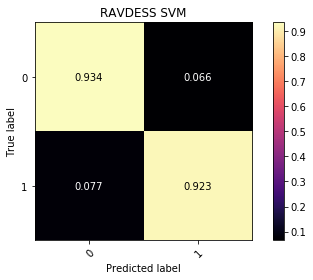

In [0]:
cm = confusion_matrix(y_val, y_predict)
cm[cm == np.nan] = 0
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
# plt.colorbar()
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.grid(False)
    
fig, ax = plt.subplots()

im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.magma )
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
  yticks=np.arange(cm.shape[0]),
  # ... and label them with the respective list entries
  xticklabels=[0, 1], yticklabels=[0,1],
  title="RAVDESS SVM",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.3f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], fmt),
      ha="center", va="center",
      color="white" if cm[i, j] < thresh else "black")
fig.tight_layout()



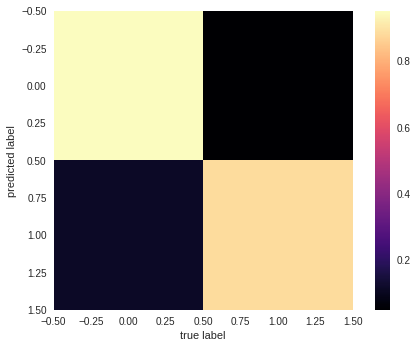

In [0]:
cm = confusion_matrix(y_val, y_predict)
cm[cm == np.nan] = 0
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.grid(False)

In [0]:
rf_predict_tess = rf.predict(scaled_tess)
print(confusion_matrix(tesspositive, rf_predict_tess))
print(accuracy_score(tesspositive, rf_predict_tess))
misclassified = []
for i in range(len(rf_predict_tess)):
  if rf_predict_tess[i] != list(tesspositive)[i]:
    #print(y_predict[i], list(y_val)[i], new_df[' emotion '][y_val.index[i]])
    misclassified.append(tess['emotion'][i])
#print(misclassified)
dict((x,misclassified.count(x)) for x in set(misclassified))


[[779 585]
 [661 309]]
0.4661525278491859


{'1': 110, '3': 235, '4': 291, '6': 21, '7': 273, '8': 316}

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_predict))

0.905982905982906


In [0]:
misclassified = []
for i in range(len(y_predict)):
  if y_predict[i] != list(y_val)[i]:
    #print(y_predict[i], list(y_val)[i], new_df[' emotion '][y_val.index[i]])
    misclassified.append(new_df[' emotion '][y_val.index[i]])
#print(misclassified)
dict((x,misclassified.count(x)) for x in set(misclassified))

{'3': 4, '4': 4, '7': 6, '8': 8}

In [0]:
new_df[' emotion '].shape
new_df.shape

(1403, 990)

JUST CLASSIFYING HAPPY VS SAD

In [0]:
happysad = [] #1 for yes 0 for negative
indices = []
for index, row in df.iterrows():
  #print(row[' emotion '])
  if(int(row[' emotion ']) in [3]): #classes are still 1-8 not 1-0, we don't need to one-hot here
    happysad.append(1)
  elif(int(row[' emotion ']) in [4]):
    happysad.append(0)
  else:
    indices.append(index)
print(happysad)
print(indices)
#print(new_df[' emotion '])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
from sklearn.metrics import confusion_matrix
X_train, X_val, y_train, y_val = train_test_split(scaled_new_df.drop(indices), happysad, test_size = .25, random_state = None)

happysad_rf = RandomForestClassifier(n_estimators=99, criterion='gini', max_depth=5, min_samples_split = 2, min_samples_leaf=3, max_features=50, random_state=None)
happysad_rf.fit(X_train, y_train)
y_predict = happysad_rf.predict(X_val)
print(confusion_matrix(y_val, y_predict))
print()

[[48  0]
 [ 4 40]]



In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_predict))

0.9565217391304348


only actor 1 data, only f1 and f2 (formants) as data. ~ 20% accuracy.

NEURAL NET STARTS BELOW

In [0]:
from sklearn import preprocessing
normal_df = pd.DataFrame()
for col in new_df.columns.values:
  normal_df[col] = preprocessing.scale(new_df[col]) 
  #new_df[col]/max(np.array(new_df[col]))
  #print(type(test_col), test_col.shape)
  #print(max(np.array(new_df[col])))
normal_df

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,pcm_intensity_sma_stddev,pcm_intensity_sma_skewness,pcm_intensity_sma_kurtosis,pcm_intensity_sma_quartile1,pcm_intensity_sma_quartile2,pcm_intensity_sma_quartile3,pcm_intensity_sma_iqr1-2,pcm_intensity_sma_iqr2-3,pcm_intensity_sma_iqr1-3,pcm_loudness_sma_max,pcm_loudness_sma_min,pcm_loudness_sma_range,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,mfcc_sma[1]_max,mfcc_sma[1]_min,...,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrA,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,F0_sma_de_quartile1,F0_sma_de_quartile2,F0_sma_de_quartile3,F0_sma_de_iqr1-2,F0_sma_de_iqr2-3,F0_sma_de_iqr1-3,F0env_sma_de_max,F0env_sma_de_min,F0env_sma_de_range,F0env_sma_de_maxPos,F0env_sma_de_minPos,F0env_sma_de_amean,F0env_sma_de_linregc1,F0env_sma_de_linregc2,F0env_sma_de_linregerrA,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,emotion,positive
0,-0.358004,-0.063948,-0.358004,-0.425966,-0.357600,-0.372978,-0.110233,-0.360054,-0.370920,-0.207733,-0.370229,1.541522,1.614191,-0.151970,-0.245872,-0.355657,-0.245038,-0.354900,-0.355645,-0.688046,-0.22482,-0.687917,-0.443099,-0.355088,-0.839638,-0.526969,-0.788326,-0.743815,-0.549534,-0.736192,0.643848,0.283861,-0.772470,-0.827298,-0.828167,-0.767562,-0.721929,-0.806741,0.818641,-1.720579,...,0.256959,1.270975,-0.581420,-0.455488,-0.427079,-0.419629,0.217784,-0.518448,-1.090196,-1.065740,-1.126694,1.592693,1.217624,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,0.820371,-0.240760,0.774369,1.051967,-0.355557,-0.831266,0.794192,-1.080115,-1.149000,0.077856,0.136447,1.663769,1.811967,0.736455,-0.134387,-0.885552,-0.733749,-0.888054,-0.855739,-1.720863,1.074777
1,-0.361132,-0.063948,-0.361132,-1.073305,-0.357600,-0.371206,-0.114189,-0.356958,-0.368987,-0.207731,-0.369604,-0.353029,-0.548605,-0.151970,-0.245865,-0.355281,-0.245031,-0.354520,-0.355269,-0.635093,-0.22482,-0.634938,-1.084394,-0.355088,-0.791856,-0.515383,-0.738610,-0.700249,-0.527630,-0.663270,1.148368,0.694586,-0.772470,-0.824063,-0.839349,-0.763744,-0.736828,-0.818357,0.338367,-0.535794,...,-1.285977,2.629427,-2.154156,-0.446307,-0.390426,-0.419629,0.200300,-0.492623,-1.026204,-1.220737,-1.378064,2.441468,0.161574,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,-0.167529,0.528702,-0.324628,1.091382,-0.580352,-1.591666,0.990488,-1.452352,-1.002366,-0.611619,-0.535874,0.667934,0.641477,0.736455,-0.134387,-0.885552,-0.733749,-0.888054,-0.855739,-1.720863,1.074777
2,-0.361132,-0.063948,-0.361132,-1.073305,-0.357600,-0.371206,-0.114189,-0.356958,-0.368987,-0.207731,-0.369604,-0.353029,-0.548605,-0.151970,-0.245865,-0.355281,-0.245031,-0.354520,-0.355269,-0.635093,-0.22482,-0.634938,-1.084394,-0.355088,-0.791856,-0.515383,-0.738610,-0.700249,-0.527630,-0.663270,1.148368,0.694586,-0.772470,-0.824063,-0.839349,-0.763744,-0.736828,-0.818357,0.338367,-0.535794,...,-1.285977,2.629427,-2.154156,-0.446307,-0.390426,-0.419629,0.200300,-0.492623,-1.026204,-1.220737,-1.378064,2.441468,0.161574,0.765308,0.004354,-0.749861,-0.765465,-0.749870,-0.762834,-0.167529,0.528702,-0.324628,1.091382,-0.580352,-1.591666,0.990488,-1.452352,-1.002366

In [0]:
normal_df.drop([' emotion '], axis=1).values

array([[-0.35800368, -0.06394835, -0.35800368, ..., -0.88805381,
        -0.85573945,  1.07477715],
       [-0.36113193, -0.06394835, -0.36113193, ..., -0.88805381,
        -0.85573945,  1.07477715],
       [-0.36113193, -0.06394835, -0.36113193, ..., -0.88805381,
        -0.85573945,  1.07477715],
       ...,
       [-0.36615117, -0.06394835, -0.36615117, ...,  0.40938122,
         0.0181343 ,  1.07477715],
       [-0.36498338, -0.06394835, -0.36498338, ...,  0.46004596,
        -0.02974928,  1.07477715],
       [-0.36498338, -0.06394835, -0.36498338, ...,  0.46004596,
        -0.02974928,  1.07477715]])

In [0]:
predicted_pos = rf.predict(scaled_new_df)
scaled_new_df['positive'] = pd.Series(predicted_pos)
train_data, val_data, train_labels, val_labels = train_test_split(scaled_new_df.loc[X_train.index], new_df.loc[y_train.index][' emotion '].astype(int)-1, test_size = .2, random_state = None) #replaced on 3/9 to have 1st/2nd split
print(train_data.shape)

#new_df.drop([' emotion '], axis=1).shape

train_data = np.array(train_data).reshape((train_data.shape[0], train_data.shape[1], 1))#normal_df.drop([' emotion '], axis=1).values.reshape((1403, 989, 1))
train_data.shape

(841, 989)


(841, 989, 1)

In [0]:
model = []
model = tf.keras.Sequential()
model.add(Dense(16, input_shape = train_data[0].shape))
#model.add(Dense(64))
model.add(Dense(16, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(.25))
model.add(Dense(4, activation='relu'))
model.add(tf.keras.layers.Dropout(.25))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)) 
model.add(tf.keras.layers.Dense(8, activation = tf.nn.softmax)) 
  
#rms = tf.keras.optimizers.RMSprop(lr=0.05, rho=0.9, epsilon=None, decay=0.00)
sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.001, nesterov=False)
#model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics =["accuracy"])
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics =["accuracy"])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 989, 16)           32        
_________________________________________________________________
dense_1 (Dense)              (None, 989, 16)           272       
_________________________________________________________________
dropout (Dropout)            (None, 989, 16)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 989, 4)            68        
_________________________________________________________________
dropout_1 (Dropout)          (None, 989, 4)            0         
_________________________________________________________________
flatten (Flatten)    

In [0]:
np.array(scaled_new_df.loc[X_train.index])

array([[-0.36309627, -0.06394835, -0.36309627, ..., -0.73374905,
        -0.09564998, -0.37022808],
       [ 1.56654332, -0.06394835,  1.56654332, ...,  1.36584922,
        -0.06139439,  0.54245882],
       [ 0.02705722, -0.06394835,  0.02705722, ..., -0.45469782,
        -0.88805381, -0.7372266 ],
       ...,
       [ 0.07530601, -0.06394835,  0.07530601, ...,  0.59087674,
         0.82490704,  0.75637124],
       [-0.35636227, -0.06394835, -0.35636226, ..., -0.73374905,
        -0.14272951, -0.39907404],
       [-0.04670664, -0.06394835, -0.04670664, ...,  1.06142788,
         0.52333672,  0.77143971]])

In [0]:
data = np.array(scaled_new_df.loc[X_train.index])
all_labels= new_df.loc[y_train.index][' emotion '].astype(int)-1
print(len(data))
# prepare cross validation
kfold = KFold(3, False, 1)
# enumerate splits
for train, test in kfold.split(data):
	#print('train: %s, test: %s' % (data[train], data[test]))
  #print(train-1)
  model.fit(data[train].reshape(len(train), data.shape[1], 1), to_categorical(all_labels.iloc[train]), verbose=True, epochs = 100, validation_split=.1)
  y_pred_temp = model.predict(data[test].reshape(len(test), data.shape[1], 1))
  print(accuracy_score(all_labels.iloc[test], np.argmax(y_pred_temp, axis=1)))
  model.reset_states()

1052
Train on 630 samples, validate on 71 samples
Epoch 1/100
630/630 [==============================] - 0s 650us/sample - loss: 2.6275 - acc: 0.1302 - val_loss: 2.2158 - val_acc: 0.0986
Epoch 2/100
630/630 [==============================] - 0s 270us/sample - loss: 2.2725 - acc: 0.1651 - val_loss: 2.1943 - val_acc: 0.1127
Epoch 3/100
630/630 [==============================] - 0s 263us/sample - loss: 2.1934 - acc: 0.1937 - val_loss: 2.0814 - val_acc: 0.2113
Epoch 4/100
630/630 [==============================] - 0s 261us/sample - loss: 2.0828 - acc: 0.2619 - val_loss: 1.9875 - val_acc: 0.3239
Epoch 5/100
630/630 [==============================] - 0s 269us/sample - loss: 2.0092 - acc: 0.2937 - val_loss: 1.9312 - val_acc: 0.3239
Epoch 6/100
630/630 [==============================] - 0s 284us/sample - loss: 1.9078 - acc: 0.3254 - val_loss: 1.8788 - val_acc: 0.3380
Epoch 7/100
630/630 [==============================] - 0s 306us/sample - loss: 1.8525 - acc: 0.3825 - val_loss: 1.8345 - val_acc

In [0]:
y = model.fit(train_data, to_categorical(train_labels), verbose = True, epochs = 100, validation_split = .2) #to_categorical(new_df[' emotion ']-1) #or positive

Train on 672 samples, validate on 169 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
672/672 [==============================] - 1s 1ms/sample - loss: 2.7825 - acc: 0.1354 - val_loss: 2.1601 - val_acc: 0.2012
Epoch 2/100
672/672 [==============================] - 0s 208us/sample - loss: 2.2424 - acc: 0.1786 - val_loss: 1.9896 - val_acc: 0.4083
Epoch 3/100
672/672 [==============================] - 0s 194us/sample - loss: 2.0920 - acc: 0.2440 - val_loss: 1.9019 - val_acc: 0.4083
Epoch 4/100
672/672 [==============================] - 0s 220us/sample - loss: 1.9760 - acc: 0.3155 - val_loss: 1.8414 - val_acc: 0.3669
Epoch 5/100
672/672 [==============================] - 0s 183us/sample - loss: 1.9356 - acc: 0.3229 - val_loss: 1.7001 - val_acc: 0.4260
Epoch 6/100
672/672 [==============================] - 0s 185us/sample - loss: 1.8391 - acc: 0.3810 - val_loss: 1.6328 - val_acc: 0.4970
Epoch 7/100
672/672 [==============================] - 0s 179us/sample - loss: 1.7249 

In [0]:
#scaled_tess.shape
scaled_tess = pd.DataFrame(scaled_tess)
scaled_tess['positive'] = pd.Series(tesspositive)

In [0]:
#predict on tess data
#scaled_tess['positive'] = pd.Series(tesspositive)
scaled_tess = np.array(scaled_tess).reshape((scaled_tess.shape[0], scaled_tess.shape[1], 1))
nn_pred_tess = model.predict(scaled_tess)
print(confusion_matrix(tessdf['emotion'].astype(int), np.argmax(nn_pred_tess, axis=1)))
print(accuracy_score(tessdf['emotion'].astype(int), np.argmax(nn_pred_tess, axis=1)))

[[  0   0   0   0   0   0   0   0   0]
 [  0  93  29   2  18  26  34   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  3   8  39  33  40 160  29  58   0]
 [  0 272   3  60   2   0  63   0   0]
 [  0   0   0  13 148 153   3   8   0]
 [  0   0   7  90   2 122   4  15   0]
 [ 14  21  37  39  48  22 216   2   0]
 [  3   3  48  20  12 124  63 125   0]]
0.12296486718080549


In [0]:
confusion_matrix(tessdf['emotion'].astype(int), np.argmax(nn_pred_tess, axis=1))

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [ 10,   6,  34,  52,   0,   0,  58, 179],
       [  0, 360,  10,   2,  12,   2,  14,   0],
       [  0,   0,   0,  16,  74, 276,   2,  32],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,  26,  28,  58,  46,  98,   0]])

In [0]:
set(tessdf['emotion'].astype(int))

{3, 4, 5, 7}

In [0]:
scaled_tess.shape

(1403, 988)

In [0]:
val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1))
y_pred = model.predict(val_data)
y_pred.shape

(351, 8)

In [0]:
print(confusion_matrix(positive, y_pred))
print(accuracy_score(positive, y_pred))

In [0]:
y_pred_proba = model.predict(val_data)
print(confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1)))
print(accuracy_score(val_labels, np.argmax(y_pred_proba, axis=1)))

[[23  2  0  0  0  0  1  1]
 [ 0 38  0  0  0  0  1  0]
 [ 0  0 51  0  0  0  0  0]
 [ 0  2  1 34  0  3  3  0]
 [ 0  0  0  0 37  0  4  0]
 [ 0  0  0  4  2 55  0  1]
 [ 2  0  0  0  2  0 39  0]
 [ 0  0  2  0  0  1  1 41]]
0.905982905982906


In [0]:
#check on 2/27
val_data = np.array(val_data).reshape((val_data.shape[0], val_data.shape[1], 1))
y_pred = model.predict(val_data)
y_pred.shape

y_pred_proba = model.predict(val_data)
print(confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1)))
print(accuracy_score(val_labels, np.argmax(y_pred_proba, axis=1)))

[[16  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 30]]
1.0


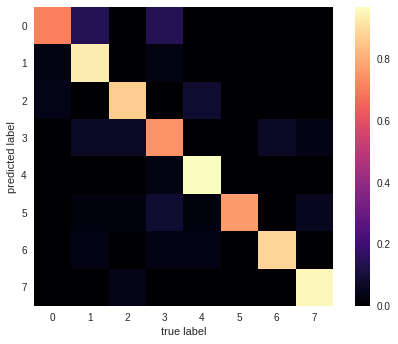

In [0]:
cm = confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1))
cm[cm == np.nan] = 0
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
plt.colorbar()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.grid(False)

In [0]:
#ACCURACY ON TEST DATA FROM 1ST SPLIT

X_val_predicted_pos = rf.predict(X_val) #add positive column to validation data
X_val_w_positive = X_val
X_val_w_positive['positive'] = X_val_predicted_pos
#X_val_w_positive

X_val_w_positive = np.array(X_val_w_positive).reshape((X_val_w_positive.shape[0], X_val_w_positive.shape[1], 1)) #reshape the validation data to input into the model


y_pred_X_val = model.predict(X_val_w_positive)
print(confusion_matrix(new_df.loc[y_val.index][' emotion '].astype(int)-1, np.argmax(y_pred_X_val, axis=1))) 
print(accuracy_score(new_df.loc[y_val.index][' emotion '].astype(int)-1, np.argmax(y_pred_X_val, axis=1)))

[[15  2  0  3  0  0  1  2]
 [ 3 52  0  1  0  0  0  0]
 [ 1  3 38  1  0  0  0  1]
 [ 0  3  0 35  0  0  3  2]
 [ 0  0  3  2 35  0  2  0]
 [ 0  3  1  0  0 41  0  1]
 [ 3  1  1  2  2  3 37  3]
 [ 0  1  1  3  0  3  0 37]]
0.8262108262108262


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


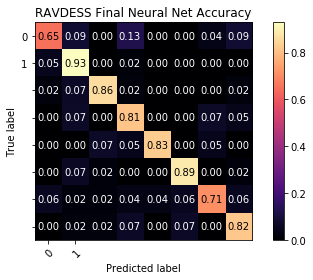

In [0]:
#cm2 is the cm for this, cm is for the svm 
#1st split svm results confusion matrix
cm2 = confusion_matrix(new_df.loc[y_val.index][' emotion '].astype(int)-1, np.argmax(y_pred_X_val, axis=1))
cm2[cm2 == np.nan] = 0
cm2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]
# plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.magma )
# plt.colorbar()
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.grid(False)
    
fig, ax = plt.subplots()

im = ax.imshow(cm2, interpolation='nearest', cmap = plt.cm.magma )
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
  yticks=np.arange(cm2.shape[0]),
  # ... and label them with the respective list entries
  xticklabels=[0, 1], yticklabels=[0,1],
  title="RAVDESS Final Neural Net Accuracy",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm2.max() / 2.
for i in range(cm2.shape[0]):
  for j in range(cm2.shape[1]):
    ax.text(j, i, format(cm2[i, j], fmt),
      ha="center", va="center",
      color="white" if cm2[i, j] < thresh else "black")
fig.tight_layout()



In [0]:
X_val_w_positive


array([[[-0.32385998],
        [-0.06394835],
        [-0.32385998],
        ...,
        [-0.88805381],
        [-0.85573945],
        [ 0.        ]],

       [[-0.17787826],
        [ 0.08607747],
        [-0.17787826],
        ...,
        [ 1.31135854],
        [ 0.98916152],
        [ 0.        ]],

       [[-0.35766735],
        [-0.06394835],
        [-0.35766735],
        ...,
        [-0.73063122],
        [-0.7244449 ],
        [ 1.        ]],

       ...,

       [[-0.35116642],
        [-0.06394835],
        [-0.35116642],
        ...,
        [-0.84430686],
        [-0.82893539],
        [ 1.        ]],

       [[-0.36611415],
        [-0.06394835],
        [-0.36611415],
        ...,
        [-0.88805381],
        [-0.85573945],
        [ 1.        ]],

       [[-0.34300737],
        [-0.06394835],
        [-0.34300737],
        ...,
        [-0.88805381],
        [-0.85573945],
        [ 0.        ]]])

In [0]:
y_pred_proba = model.predict(val_data)
print(confusion_matrix(val_labels, np.argmax(y_pred_proba, axis=1)))
print(accuracy_score(val_labels, np.argmax(y_pred_proba, axis=1)))

[[18  2  0  1  1  0  0  0]
 [ 0 52  0  1  0  0  0  0]
 [ 0  0 42  0  4  2  0  2]
 [ 0  0  0 36  0  3  0  0]
 [ 0  0  0  0 35  0  2  1]
 [ 1  0  0  1  0 39  0  1]
 [ 0  0  0  1  0  2 50  0]
 [ 0  0  0  0  0  0  0 54]]
0.9287749287749287


In [0]:
np.argmax(y_pred_proba, axis=1)

array([2, 0, 4, 5, 3, 6, 1, 6, 2, 4, 2, 6, 6, 0, 4, 7, 1, 7, 0, 5, 5, 5,
       5, 6, 5, 7, 3, 1, 2, 1, 4, 5, 5, 3, 3, 3, 0, 2, 6, 5, 2, 5, 6, 4,
       2, 5, 2, 1, 5, 7, 4, 1, 5, 2, 3, 5, 7, 5, 3, 6, 1, 2, 3, 3, 3, 6,
       4, 6, 6, 7, 5, 7, 7, 4, 4, 1, 2, 6, 7, 2, 6, 3, 7, 5, 0, 2, 6, 6,
       5, 2, 3, 6, 5, 2, 1, 0, 6, 4, 3, 7, 2, 5, 7, 1, 4, 2, 6, 5, 1, 1,
       2, 5, 6, 5, 7, 3, 6, 5, 7, 5, 7, 4, 1, 2, 6, 5, 3, 2, 2, 5, 6, 5,
       7, 5, 7, 0, 5, 7, 1, 4, 0, 7, 0, 3, 3, 4, 5, 6, 2, 6, 6, 5, 6, 7,
       0, 4, 4, 7, 7, 7, 7, 2, 3, 2, 2, 5, 3, 1, 7, 2, 1, 4, 6, 1, 4, 6,
       5, 4, 2, 4, 1, 1, 3, 4, 5, 0, 7, 2, 1, 4, 6, 2, 3, 0, 6, 7, 4, 3,
       4, 7, 5, 4, 1, 2, 4, 7, 5, 2, 3, 5, 4, 1, 6, 2, 2, 1, 1, 7, 4, 6,
       5, 4, 3, 2, 4, 0, 7, 1, 1, 3, 2, 2, 0, 0, 6, 7, 5, 7, 2, 3, 6, 6,
       6, 0, 0, 6, 6, 5, 7, 7, 5, 6, 1, 4, 2, 3, 6, 4, 6, 3, 3, 7, 3, 5,
       5, 7, 1, 2, 1, 6, 4, 2, 1, 3, 6, 7, 5, 2, 1, 6, 1, 0, 5, 5, 5, 2,
       0, 6, 2, 2, 4, 1, 5, 2, 5, 1, 5, 4, 5, 4, 1,